# Predicting Delhi's Air Quality Index with Time Series Prophet Model
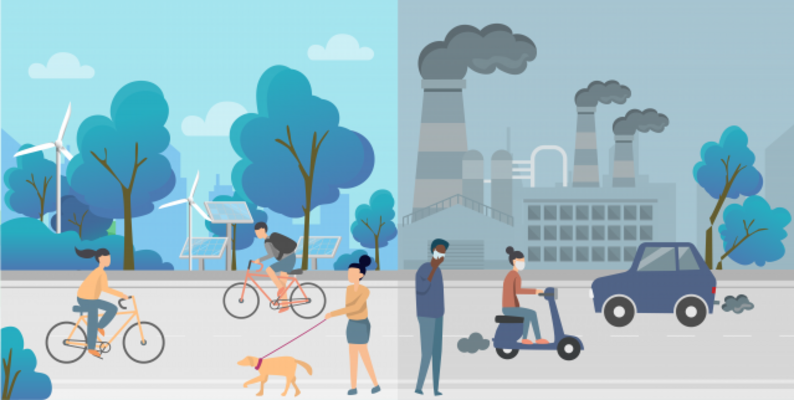

## **About Dataset**
This dataset contains air quality data from the national capital of Delhi, India. It includes information on air pollution levels, including particulate matter (PM2.5 and PM10) levels, nitrogen dioxide (NO2), sulfur dioxide (SO2), carbon dioxide (CO2), ozone (O3), and other pollutants.

# **Tasks** :


*   Importing Libraries
*   Loading the Dataset
*   Data Analysis
*   Predicting the concentration of PM2.5 using Prophet Model
*   Durbin-Watson Test
*   Evaluating the Predictions



# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
dataset = pd.read_csv('delhi_aqi.csv')
dataset.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [3]:
dataset.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [4]:
dataset.shape

(18776, 9)

In [7]:
# checking the missing value
dataset.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [11]:
# Converting the date column's datatype to datetime
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.3 MB


In [12]:
dataset.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


# EDA

In [13]:
df = dataset.copy()

# Distribution of Dataset

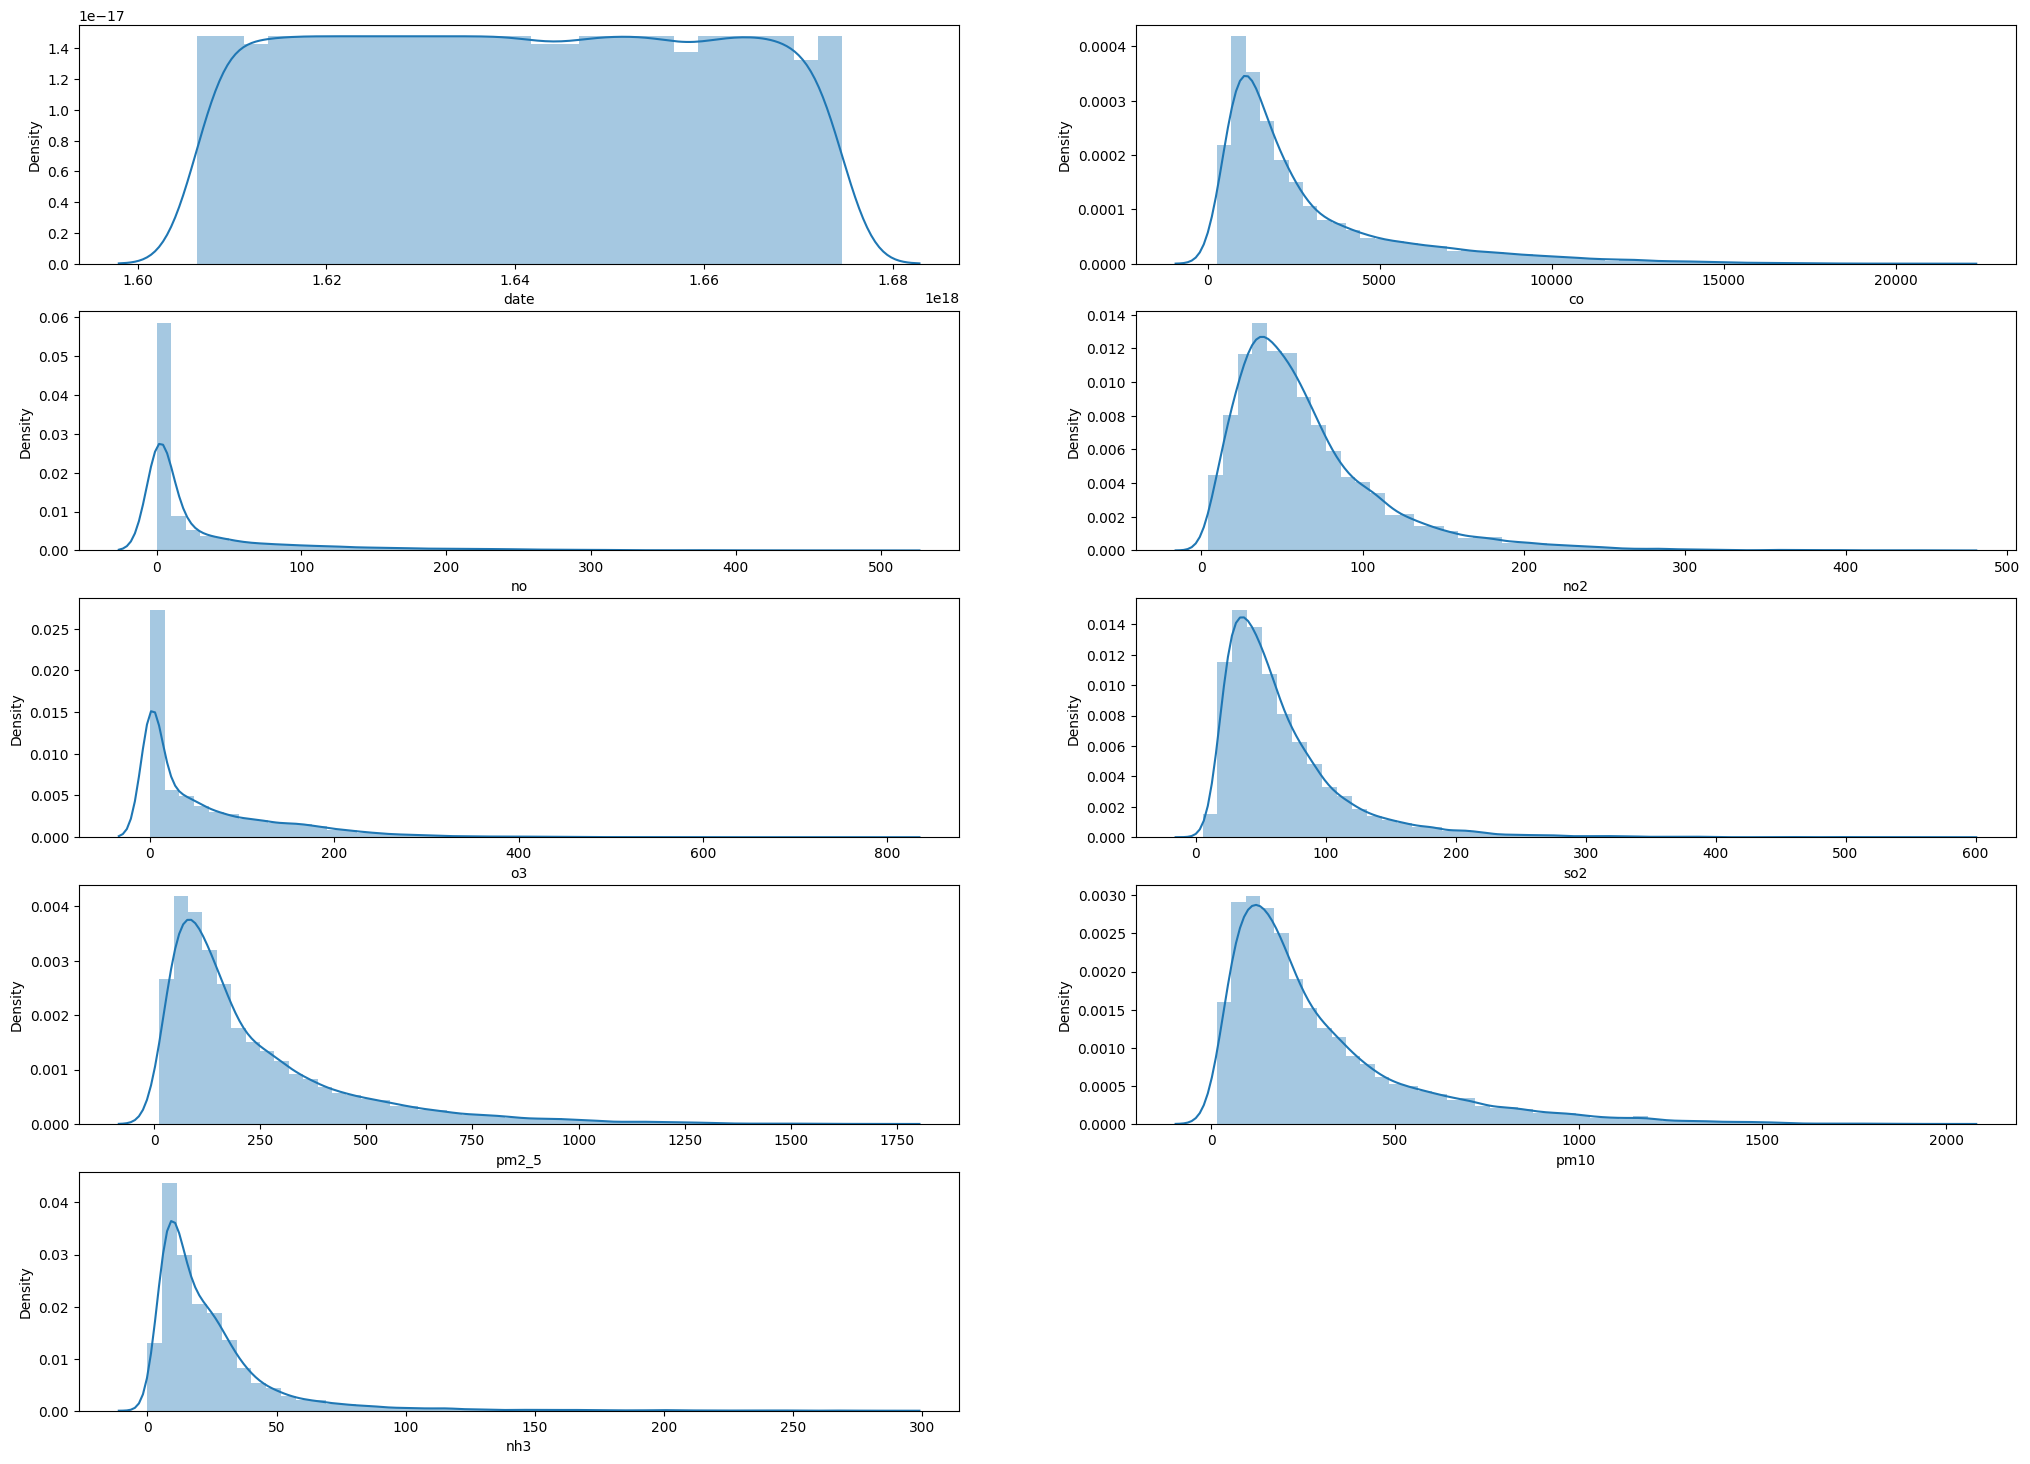

In [14]:
plot=1
plt.figure(figsize=(25,18))
for i in df.columns:
    plt.subplot(5,2,plot)
    sns.distplot(df[i])
    plot = plot+1

plt.show()

# Working with the Date column

In [15]:
df['Date'] = df['date'].dt.date
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,Year,Month,Day,Weekday,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25,2020,11,25,Wednesday,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25,2020,11,25,Wednesday,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25,2020,11,25,Wednesday,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25,2020,11,25,Wednesday,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25,2020,11,25,Wednesday,5


In [16]:
# Adding Season column - Summer,Autumn,Winter,Spring
def season_creation(x):
    if x in [2,3,4]:
        season = "Spring"
    elif x in [5,6]:
        season = "Summer"
    elif x in [7,8]:
        season = "Monsoon"
    elif x in [9,10]:
        season = "Autumn"
    elif x in[11,12,1]:
        season = "Winter"
    return season

In [17]:
df["Season"] = df["Month"].apply(season_creation)
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,Year,Month,Day,Weekday,hour,Season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25,2020,11,25,Wednesday,1,Winter
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25,2020,11,25,Wednesday,2,Winter
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25,2020,11,25,Wednesday,3,Winter
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25,2020,11,25,Wednesday,4,Winter
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25,2020,11,25,Wednesday,5,Winter


# **Visualizing the Particulate Matter 2.5 on different weekdays in different season**

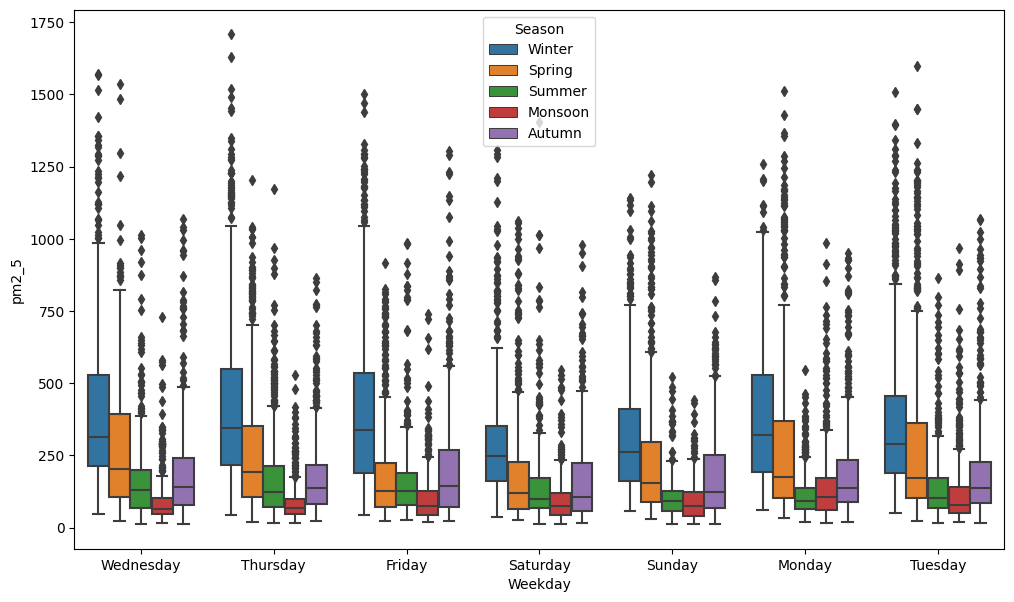

In [18]:
plt.figure(figsize = (12,7))
sns.boxplot(x = df['Weekday'], y = df['pm2_5'], hue = df['Season'])
plt.show()

## Observations:
* Winter and Spring have the highest PM2.5 which is quite expected.
* Monsoon season have the least PM2.5
* Weekends have less PM2.5

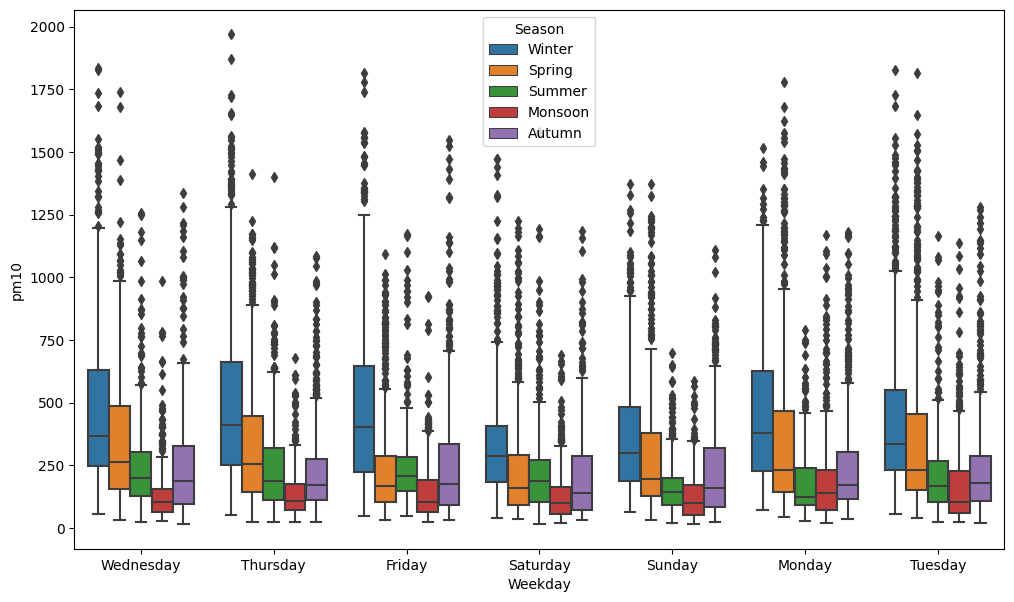

In [19]:
# Visualizing the Particulate Matter 10 on different weekdays in different season
plt.figure(figsize = (12,7))
sns.boxplot(x = df['Weekday'], y = df['pm10'], hue = df['Season'])
plt.show()

# **Visualize the monthly distribution of pollutants**

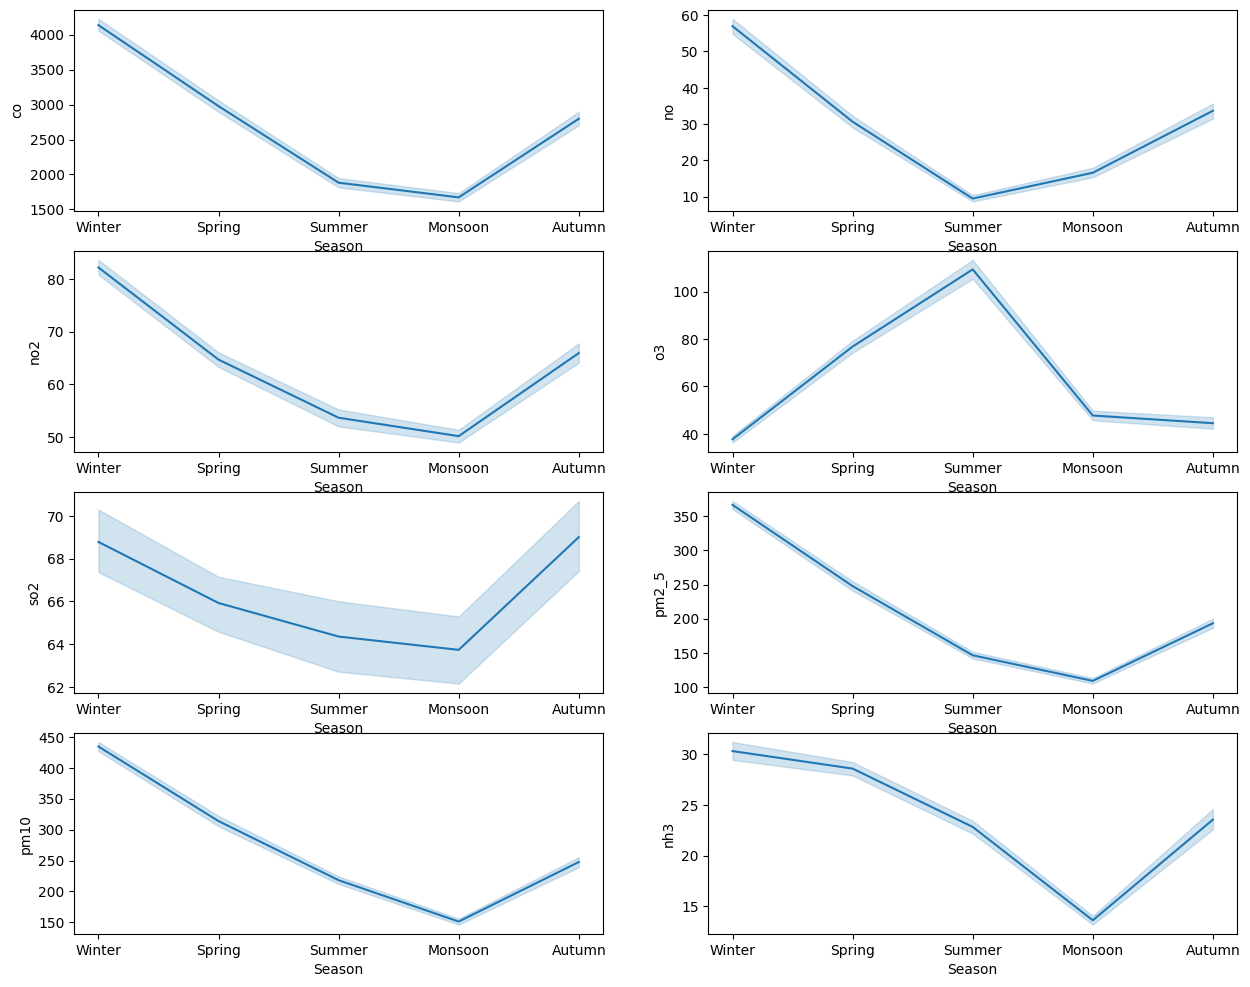

In [20]:
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x = df['Season'], y = df[i])
    plot = plot+1
plt.show()

## Observations :
* In winters the level of pollutants is maximum
* Ozone is minimum in winters, maximum in summers

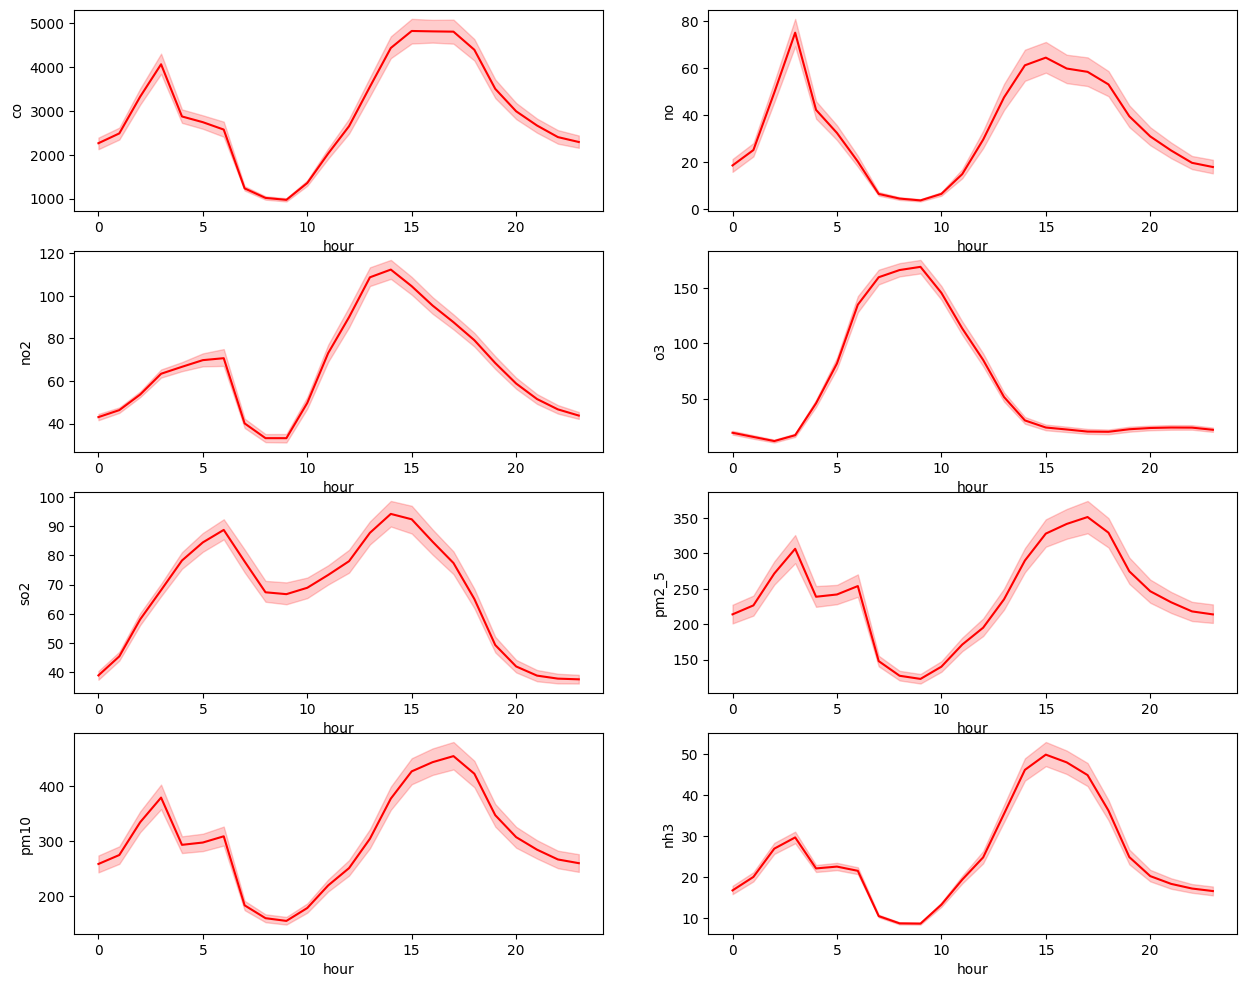

In [21]:
# Hourly Concentration trend of pollutants
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x='hour', y = i, data = df, color = 'r')
    plot = plot+1
plt.show()

## Observation :
* Evening hours are the peak time for the concentration of pollutants
* Concentration of pollutants is lowest in the morning except SO2

In [22]:
def avr_plot(x, col):
    avg_df = df.groupby(x).mean()[col]
    sns.barplot(x = avg_df.index, y = avg_df.values, palette = 'husl')
    plt.ylabel('Concentration')
    plt.show()

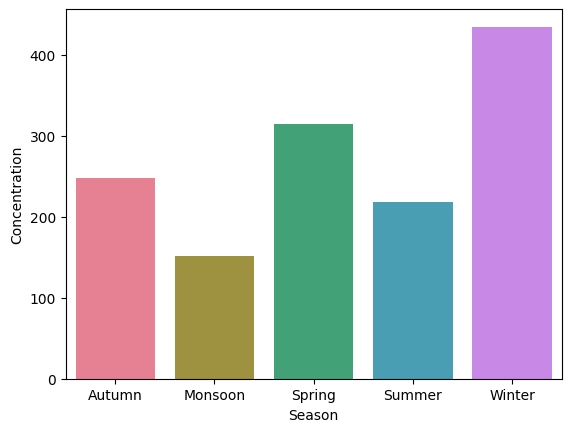

In [23]:
# Concentraion of PM10 OVER THE SEASON
avr_plot('Season', 'pm10')

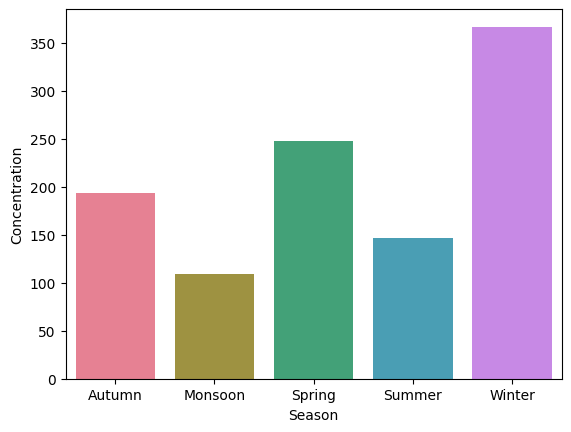

In [24]:
# Concentraion of PM2.5 OVER THE SEASON
avr_plot('Season', 'pm2_5')

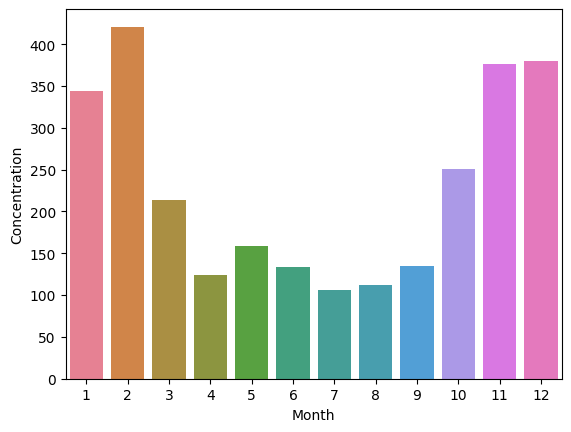

In [25]:
# Concentraion of PM2.5 OVER THE Month
avr_plot('Month', 'pm2_5')

# Predicting the value of PM2.5 using Prophet Model

In [26]:
dataset.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [27]:
dataset['Date'] = dataset['date'].dt.date

In [28]:
df_pred = dataset[['Date','pm2_5']]
df_pred.head()

,Date,pm2_5
0,2020-11-25,364.61
1,2020-11-25,420.96
2,2020-11-25,463.68
3,2020-11-25,454.81
4,2020-11-25,448.14


In [29]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    18776 non-null  object 
 1   pm2_5   18776 non-null  float64
dtypes: float64(1), object(1)
memory usage: 293.5+ KB


In [30]:
# Converting the data type of Date column
df_pred['Date'] = pd.to_datetime(df_pred['Date'])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    18776 non-null  datetime64[ns]
 1   pm2_5   18776 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 293.5 KB


In [31]:
df_pred = df_pred.groupby('Date')['pm2_5'].sum().reset_index()
df_pred.head()

,Date,pm2_5
0,2020-11-25,7872.94
1,2020-11-26,4338.10
2,2020-11-27,2781.64
3,2020-11-28,4749.34
4,2020-11-29,7905.16


In [32]:
df_pred1 = df_pred.copy()
df_pred1.set_index('Date', inplace=True)
df_pred1.head()

,pm2_5
Date,
2020-11-25,7872.94
2020-11-26,4338.10
2020-11-27,2781.64
2020-11-28,4749.34
2020-11-29,7905.16


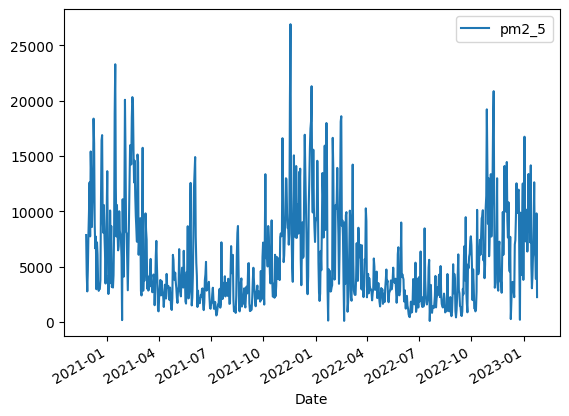

In [33]:
df_pred1.plot()
plt.show()

# Durbin Watson Test

In [34]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_pred1)

array([0.20840269])

# Decomposition Component - Trend & Seasonality

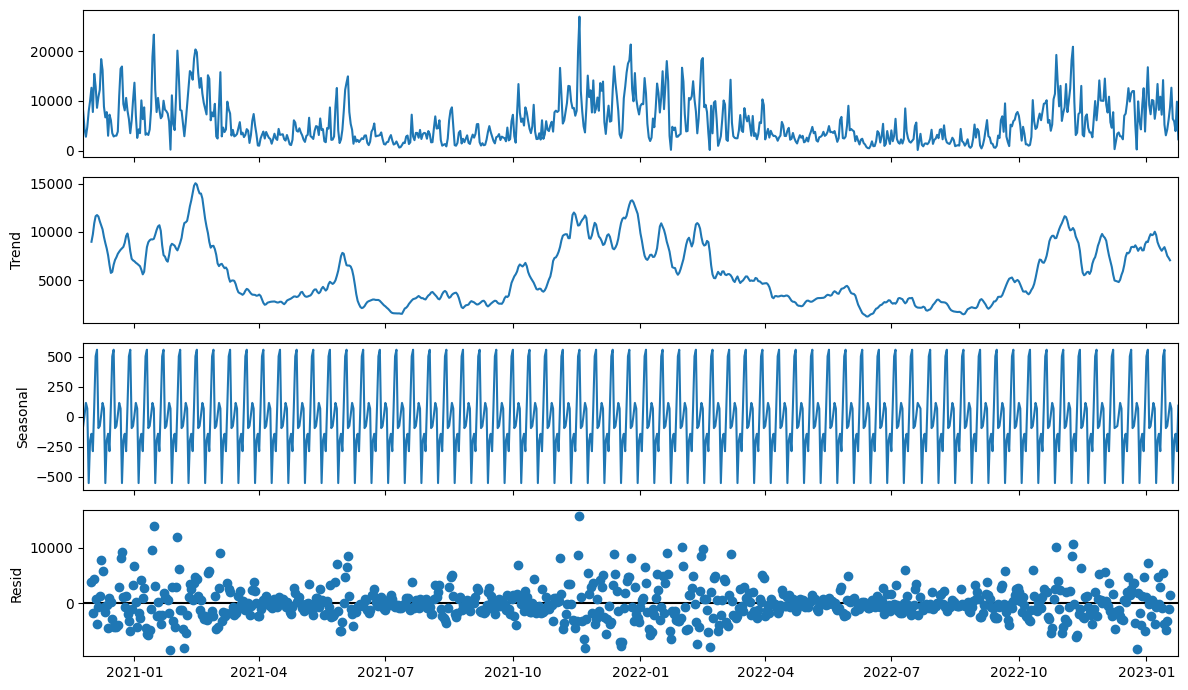

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
decomposition_additive = seasonal_decompose(df_pred1, model = 'additive', period=12)
decomposition_additive.plot()
plt.show()

In [36]:
import prophet

In [37]:
df_prophet = df_pred.rename(columns={'Date':'ds', 'pm2_5':'y'})                   # Renaming the column names according to Prophet's guidelines
df_prophet

,ds,y
0,2020-11-25,7872.94
1,2020-11-26,4338.10
2,2020-11-27,2781.64
3,2020-11-28,4749.34
4,2020-11-29,7905.16
...,...,...
784,2023-01-20,6378.28
785,2023-01-21,5880.71
786,2023-01-22,3910.64
787,2023-01-23,9829.13


In [38]:
from prophet import Prophet

In [39]:
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpokeswu3x/mlwv40mp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpokeswu3x/hwaqlsin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3349', 'data', 'file=/tmp/tmpokeswu3x/mlwv40mp.json', 'init=/tmp/tmpokeswu3x/hwaqlsin.json', 'output', 'file=/tmp/tmpokeswu3x/prophet_modelvozv9kkr/prophet_model-20231008061412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [41]:
# Building Time Series Forecasting Model by using FB Prophet model
# Predicting 6 months data

future_data = model.make_future_dataframe(periods = 180, freq='D')

In [42]:
future_data

,ds
0,2020-11-25
1,2020-11-26
2,2020-11-27
3,2020-11-28
4,2020-11-29
...,...
964,2023-07-19
965,2023-07-20
966,2023-07-21
967,2023-07-22


In [43]:
df_prophet.shape

(789, 2)

In [44]:
future_data.shape

(969, 1)

In [45]:
prediction = model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-25,5893.957277,5866.601895,13970.936275,5893.957277,5893.957277,4090.883301,4090.883301,4090.883301,422.812479,422.812479,422.812479,3668.070823,3668.070823,3668.070823,0.0,0.0,0.0,9984.840578
1,2020-11-26,5892.243224,5834.026652,14485.513968,5892.243224,5892.243224,4227.083264,4227.083264,4227.083264,620.028058,620.028058,620.028058,3607.055206,3607.055206,3607.055206,0.0,0.0,0.0,10119.326488
2,2020-11-27,5890.529171,5143.565529,13689.280706,5890.529171,5890.529171,3579.063727,3579.063727,3579.063727,34.429811,34.429811,34.429811,3544.633916,3544.633916,3544.633916,0.0,0.0,0.0,9469.592898
3,2020-11-28,5888.815118,3792.229186,12632.389578,5888.815118,5888.815118,2485.994139,2485.994139,2485.994139,-995.158843,-995.158843,-995.158843,3481.152981,3481.152981,3481.152981,0.0,0.0,0.0,8374.809257
4,2020-11-29,5887.101065,3800.735006,12415.039160,5887.101065,5887.101065,2541.089351,2541.089351,2541.089351,-875.940699,-875.940699,-875.940699,3417.030050,3417.030050,3417.030050,0.0,0.0,0.0,8428.190416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2023-07-19,4764.048529,-1816.239091,6554.981879,4755.357227,4773.023009,-2244.834283,-2244.834283,-2244.834283,422.812479,422.812479,422.812479,-2667.646762,-2667.646762,-2667.646762,0.0,0.0,0.0,2519.214246
965,2023-07-20,4762.893314,-1582.222981,6747.155346,4754.154830,4771.949226,-2086.647026,-2086.647026,-2086.647026,620.028058,620.028058,620.028058,-2706.675085,-2706.675085,-2706.675085,0.0,0.0,0.0,2676.246287
966,2023-07-21,4761.738098,-2272.160884,6235.847947,4752.902932,4770.893524,-2712.506290,-2712.506290,-2712.506290,34.429811,34.429811,34.429811,-2746.936101,-2746.936101,-2746.936101,0.0,0.0,0.0,2049.231808
967,2023-07-22,4760.582883,-3189.316768,5105.478574,4751.614247,4769.888141,-3781.650671,-3781.650671,-3781.650671,-995.158843,-995.158843,-995.158843,-2786.491829,-2786.491829,-2786.491829,0.0,0.0,0.0,978.932212


In [46]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [47]:
prediction[['ds','yhat_lower', 'yhat_upper', 'yhat']].tail(180)

,ds,yhat_lower,yhat_upper,yhat
789,2023-01-25,3257.386308,11229.344280,7395.424815
790,2023-01-26,3532.753968,11870.668429,7696.833786
791,2023-01-27,3288.293288,11473.811880,7243.805919
792,2023-01-28,2338.168976,10610.032381,6373.415229
793,2023-01-29,2483.442626,11040.808679,6676.065737
...,...,...,...,...
964,2023-07-19,-1816.239091,6554.981879,2519.214246
965,2023-07-20,-1582.222981,6747.155346,2676.246287
966,2023-07-21,-2272.160884,6235.847947,2049.231808
967,2023-07-22,-3189.316768,5105.478574,978.932212


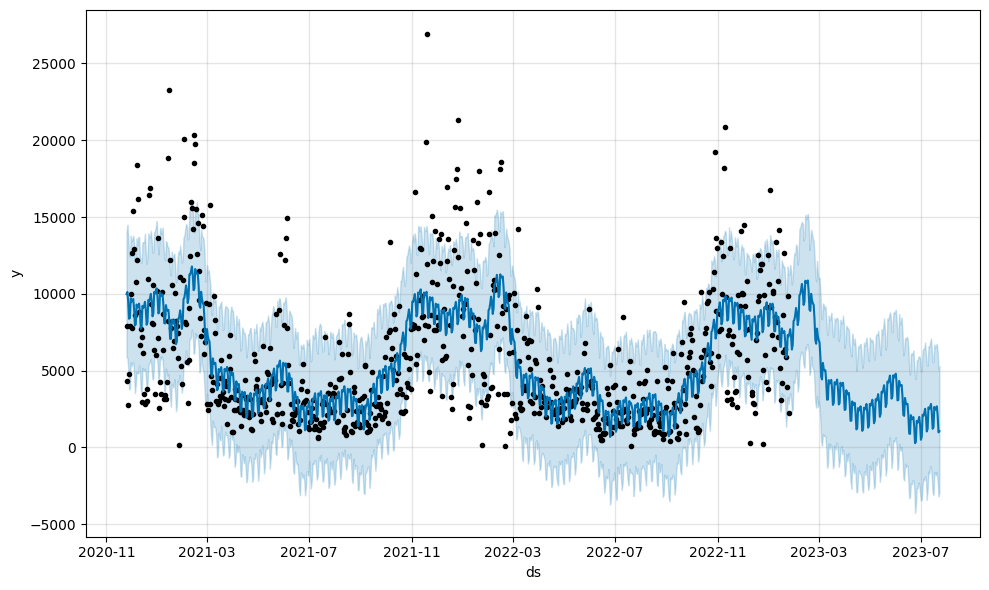

In [48]:
model.plot(prediction)
plt.show()

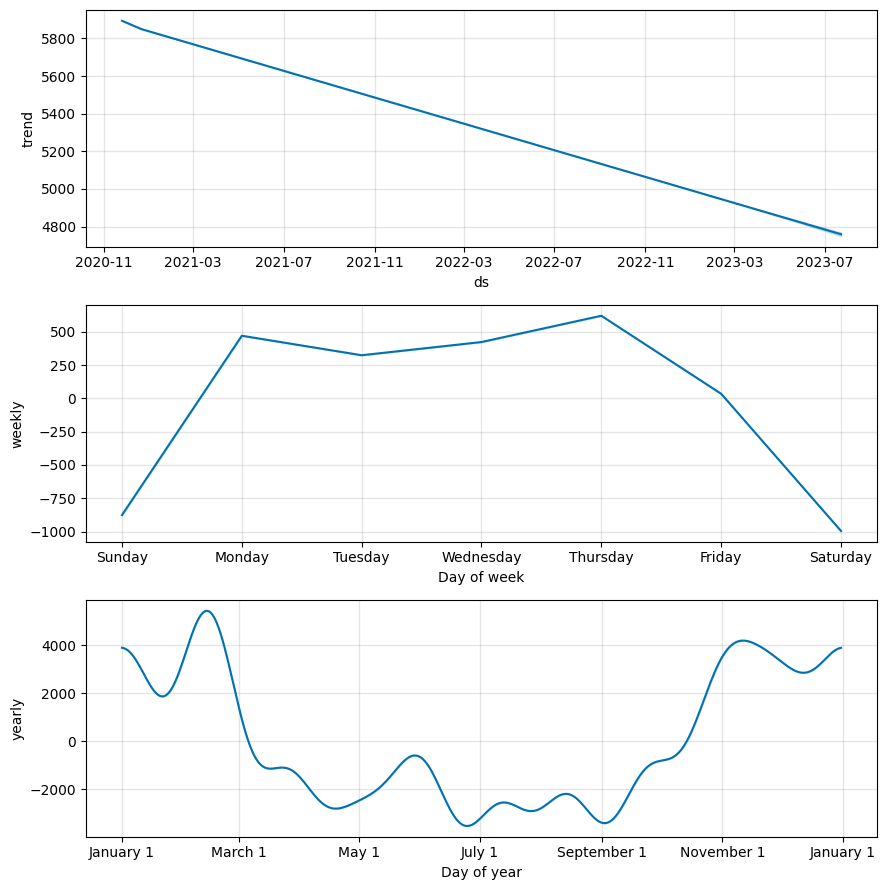

In [49]:
model.plot_components(prediction)
plt.show()

In [50]:
# cross validation :
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial='90 days')

INFO:prophet:Making 45 forecasts with cutoffs between 2021-03-05 00:00:00 and 2022-12-25 00:00:00


  0%|          | 0/45 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpokeswu3x/320ptf69.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpokeswu3x/_7go539z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27159', 'data', 'file=/tmp/tmpokeswu3x/320ptf69.json', 'init=/tmp/tmpokeswu3x/_7go539z.json', 'output', 'file=/tmp/tmpokeswu3x/prophet_modelqxvffm3r/prophet_model-20231008061414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpokeswu3x/hpffrzb8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpokeswu3x/52dlxbo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

# **Evaluating the predictions**

In [51]:
from prophet.diagnostics import performance_metrics

In [52]:
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.236835e+07,3516.865979,2617.287501,0.715354,0.417751,0.540730,0.762687
1,4 days,1.376281e+07,3709.826187,2795.343960,0.737923,0.467470,0.587949,0.785406
2,5 days,1.419930e+07,3768.195457,2876.384487,0.762381,0.465668,0.611263,0.793035
3,6 days,1.427444e+07,3778.153174,2838.855073,0.774943,0.455629,0.620678,0.814428
4,7 days,1.669205e+07,4085.591059,3016.172533,1.731179,0.446124,0.666997,0.770315
5,8 days,1.723186e+07,4151.127428,3089.964655,1.704381,0.465839,0.691079,0.746269
6,9 days,1.781078e+07,4220.281685,3140.568868,2.193471,0.471753,0.709533,0.731343
7,10 days,1.765949e+07,4202.319696,3177.357602,1.349725,0.497684,0.705724,0.716418
8,11 days,1.775301e+07,4213.432523,3132.123757,1.386468,0.584455,0.691378,0.740630
9,12 days,1.902889e+07,4362.211215,3253.138234,1.002061,0.594268,0.698966,0.711277


In [53]:
from prophet.plot import plot_cross_validation_metric

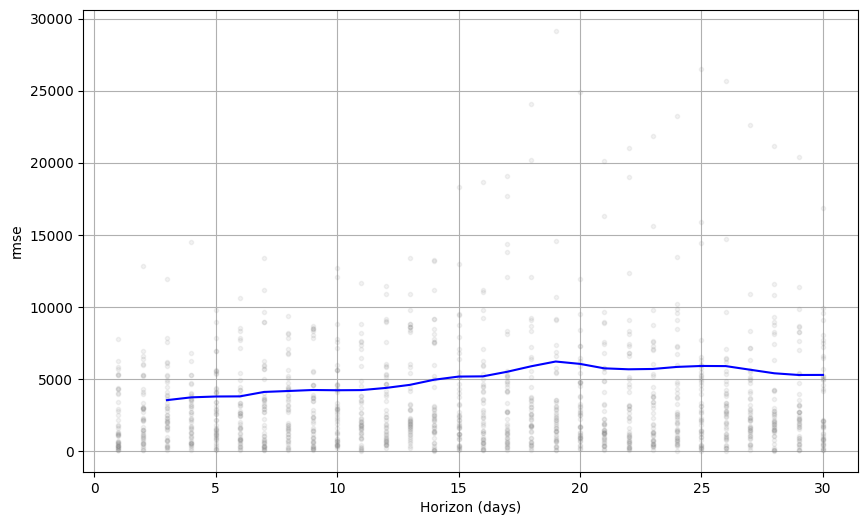

In [54]:
plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

# CONCLUSION :
* The concentration of pollutants vary in the months. Monsoon Season have low concentration while in winters pollutants level is high
* Morning hours have clean air as compared to the evening hours
* Root Mean Square value is almost constant for the next 30 days prediction